In [1]:
from nimlab import datasets as nimds
import numpy as np
from nilearn import image, plotting, maskers
import nibabel as nib
import os
import pandas as pd
import glob
import platform
import warnings
warnings.filterwarnings('ignore')
import nilearn

In [9]:
## Paths Input Here
analysis = "spcorrel/ad_dbs_to_gm_z_scores_unthresholded"
if platform.uname().system == 'Darwin': #------------------------------Mac OS X---------------------------------------------------------------
    target1 = r'/Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_AD_DBS_FORNIX/response_topology/voxelwise_glm/stim_by_age/palm_results/palm_statistic_topology/generated_nifti.nii'
    target2 = r'/Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_AD_DBS_FORNIX/cat12/cat12_ultrafine-reg/r_maps/csf_atrophy_z_atrophyr_map'
    # out_dir = rf'/Users/cu135/Dropbox (Partners HealthCare)/yeo_analysis/precomputed_connectome/{analysis}'
    out_dir = os.path.join(os.path.dirname(target1), f'{analysis}')
    #out_dir = r'path to out dir here'
    print('I have set pathnames in the Mac style')
else: #----------------------------------------------------------------Windows----------------------------------------------------------------
    conn_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_AvgR.csv'
    clin_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\patient_data\AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    # clin_path = 'path to clinical values'
    out_dir = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\stats'
    #out_dir = r'path to out dir here'
    x_roi_names = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_names.csv'
    #roi_names = '<path to roi name location>'
    print('I have set pathnames in the Windows style')
    

if os.path.isdir(out_dir) != True:
    os.makedirs(out_dir)

remove_zero = False
z_score_df1 = False
z_score_df2 = False
rfz_transform_target1 = False
rfz_transform_target2 = False
threshold_df1 = False
threshold_df2 = False

I have set pathnames in the Mac style


In [10]:
#Import matrix values from dataset1
## Use this if you are simply comparing two groups of niftis
from calvin_utils.import_matrices import import_matrices_from_folder
from calvin_utils.matrix_utilities import threshold_matrix

matrix_df1 = import_matrices_from_folder(connectivity_path=target1, file_pattern='')
if z_score_df1:
    from calvin_utils.z_score_matrix import z_score_matrix
    for col in matrix_df1.columns:
        matrix_df1[col] = matrix_df1[col].apply(lambda x: z_score_matrix(x))
if rfz_transform_target1:
    from calvin_utils.fisher_z_transform import fisher_z_transform
    for col in matrix_df1.columns:
        matrix_df1[col] = matrix_df1[col].apply(lambda x: fisher_z_transform(x))
if threshold_df1:
    matrix_df1 = threshold_matrix(matrix_df1, threshold = 2, probability=False, direction='keep_greater')

matrix_df1.tail(3)


I will search:  /Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_AD_DBS_FORNIX/response_topology/voxelwise_glm/stim_by_age/palm_results/palm_statistic_topology/generated_nifti.nii
cannot further split name


,palm_results/palm_statistic_topology/generated_nifti.nii
902626,0.0
902627,0.0
902628,0.0


In [11]:
#Import matrix values from dataset 2
from calvin_utils.import_matrices import import_matrices_from_folder
# /Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_AD_DBS_FORNIX/rawdata/sub-103/z_score_atrophyf/grey_matter/generated_nifti.nii
matrix_df2 = import_matrices_from_folder(target2, file_pattern='*//*/*/*nii')
if z_score_df2:
    from calvin_utils.z_score_matrix import z_score_matrix
    for col in matrix_df1.columns:
        matrix_df2[col] = matrix_df2[col].apply(lambda x: z_score_matrix(x))
if rfz_transform_target2:
    from calvin_utils.fisher_z_transform import fisher_z_transform
    for col in matrix_df2.columns:
        matrix_df2[col] = matrix_df2[col].apply(lambda x: fisher_z_transform(x))
if threshold_df2:
    matrix_df2 = threshold_matrix(matrix_df2, threshold = -2, probability=False, direction='keep_lesser')
    
matrix_df2


I will search:  /Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_AD_DBS_FORNIX/cat12/cat12_ultrafine-reg/r_maps/csf_atrophy_z_atrophyr_map*//*/*/*nii
cannot further split name
cannot further split name
cannot further split name
cannot further split name
cannot further split name
cannot further split name
cannot further split name
cannot further split name
cannot further split name
cannot further split name
cannot further split name
cannot further split name


,r_squared_map/% Change from Baseline (CDR)/generated_nifti.nii,r_squared_map/Age at DOS/generated_nifti.nii,r_squared_map/% Change from baseline (ADAS-Cog11)/generated_nifti.nii,r_squared_map/mtl/generated_nifti.nii,p_map/% Change from Baseline (CDR)/generated_nifti.nii,p_map/Age at DOS/generated_nifti.nii,p_map/% Change from baseline (ADAS-Cog11)/generated_nifti.nii,p_map/mtl/generated_nifti.nii,r_map/% Change from Baseline (CDR)/generated_nifti.nii,r_map/Age at DOS/generated_nifti.nii,r_map/% Change from baseline (ADAS-Cog11)/generated_nifti.nii,r_map/mtl/generated_nifti.nii
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Join Dataframes
matrix_df1.reset_index(); matrix_df2.reset_index()
print('df1 len: ', len(matrix_df1), ' matrix_df2 len: ', len(matrix_df2))
merged_df = pd.concat([matrix_df1, matrix_df2], axis=1, ignore_index=False)
display(merged_df)
np.count_nonzero(merged_df.iloc[:,-1])

df1 len:  902629  matrix_df2 len:  902629


,palm_results/palm_statistic_topology/generated_nifti.nii,r_squared_map/% Change from Baseline (CDR)/generated_nifti.nii,r_squared_map/Age at DOS/generated_nifti.nii,r_squared_map/% Change from baseline (ADAS-Cog11)/generated_nifti.nii,r_squared_map/mtl/generated_nifti.nii,p_map/% Change from Baseline (CDR)/generated_nifti.nii,p_map/Age at DOS/generated_nifti.nii,p_map/% Change from baseline (ADAS-Cog11)/generated_nifti.nii,p_map/mtl/generated_nifti.nii,r_map/% Change from Baseline (CDR)/generated_nifti.nii,r_map/Age at DOS/generated_nifti.nii,r_map/% Change from baseline (ADAS-Cog11)/generated_nifti.nii,r_map/mtl/generated_nifti.nii
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


116815

In [13]:
#Mask the Df
#----------------------------------------------------------------deprecated/
mask = None
if mask == True:
    mask_obj = nilearn.datasets.load_mni152_brain_mask().get_fdata()
    print(mask_obj.shape)
    mask_obj = mask.flatten()

    # Apply the mask to the matrix
    matrix_df1 = np.where(matrix_df1[mask_obj > 0], 0, matrix_df1)
#----------------------------------------------------------------/deprecated
#Remove zeros from the df
if remove_zero:
    nonzero_df = merged_df[merged_df != 0].dropna()
else:
    nonzero_df = merged_df
display(nonzero_df)

,palm_results/palm_statistic_topology/generated_nifti.nii,r_squared_map/% Change from Baseline (CDR)/generated_nifti.nii,r_squared_map/Age at DOS/generated_nifti.nii,r_squared_map/% Change from baseline (ADAS-Cog11)/generated_nifti.nii,r_squared_map/mtl/generated_nifti.nii,p_map/% Change from Baseline (CDR)/generated_nifti.nii,p_map/Age at DOS/generated_nifti.nii,p_map/% Change from baseline (ADAS-Cog11)/generated_nifti.nii,p_map/mtl/generated_nifti.nii,r_map/% Change from Baseline (CDR)/generated_nifti.nii,r_map/Age at DOS/generated_nifti.nii,r_map/% Change from baseline (ADAS-Cog11)/generated_nifti.nii,r_map/mtl/generated_nifti.nii
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#Perform Correlation
method_choice=1 #default = 0 
##--------------------------------user input above--------------------------------
methods = ['pearson', 'spearman', 'kendall']
corr_df = nonzero_df.corr(method=methods[method_choice])
display(corr_df)

,palm_results/palm_statistic_topology/generated_nifti.nii,r_squared_map/% Change from Baseline (CDR)/generated_nifti.nii,r_squared_map/Age at DOS/generated_nifti.nii,r_squared_map/% Change from baseline (ADAS-Cog11)/generated_nifti.nii,r_squared_map/mtl/generated_nifti.nii,p_map/% Change from Baseline (CDR)/generated_nifti.nii,p_map/Age at DOS/generated_nifti.nii,p_map/% Change from baseline (ADAS-Cog11)/generated_nifti.nii,p_map/mtl/generated_nifti.nii,r_map/% Change from Baseline (CDR)/generated_nifti.nii,r_map/Age at DOS/generated_nifti.nii,r_map/% Change from baseline (ADAS-Cog11)/generated_nifti.nii,r_map/mtl/generated_nifti.nii
palm_results/palm_statistic_topology/generated_nifti.nii,1.000000,0.203835,0.204253,0.203527,0.203434,0.203783,0.203365,0.204091,0.204183,0.024805,0.073624,-0.061039,-0.014562
r_squared_map/% Change from Baseline (CDR)/generated_nifti.nii,0.203835,1.000000,0.993377,0.995119,0.993435,0.987256,0.993879,0.992137,0.993819,0.113623,0.301216,-0.302954,-0.083651
r_squared_map/Age at DOS/generated_nifti.nii,0.204253,0.993377,1.000000,0.993876,0.993328,0.993879,0.987256,0.993380,0.993928,0.094350,0.322713,-0.304757,-0.080673
r_squared_map/% Change from baseline (ADAS-Cog11)/generated_nifti.nii,0.203527,0.995119,0.993876,1.000000,0.993327,0.992137,0.993380,0.987256,0.993928,0.118830,0.309780,-0.321844,-0.081154
r_squared_map/mtl/generated_nifti.nii,0.203434,0.993435,0.993328,0.993327,1.000000,0.993821,0.993929,0.993929,0.987257,0.103564,0.305985,-0.300076,-0.087637
p_map/% Change from Baseline (CDR)/generated_nifti.nii,0.203783,0.987256,0.993879,0.992137,0.993821,1.000000,0.993378,0.995119,0.993437,0.090674,0.316471,-0.302520,-0.085738
p_map/Age at DOS/generated_nifti.nii,0.203365,0.993879,0.987256,0.993380,0.993929,0.993378,1.000000,0.993876,0.993328,0.109943,0.294975,-0.300716,-0.088716
p_map/% Change from baseline (ADAS-Cog11)/generated_nifti.nii,0.204091,0.992137,0.993380,0.987256,0.993929,0.995119,0.993876,1.000000,0.993328,0.085467,0.307908,-0.283629,-0.088234
p_map/mtl/generated_nifti.nii,0.204183,0.993819,0.993928,0.993928,0.987257,0.993437,0.993328,0.993328,1.000000,0.100736,0.311698,-0.305406,-0.081751
r_map/% Change from Baseline (CDR)/generated_nifti.nii,0.024805,0.113623,0.094350,0.118830,0.103564,0.090674,0.109943,0.085467,0.100736,1.000000,-0.032214,-0.415258,0.032988


<AxesSubplot: >

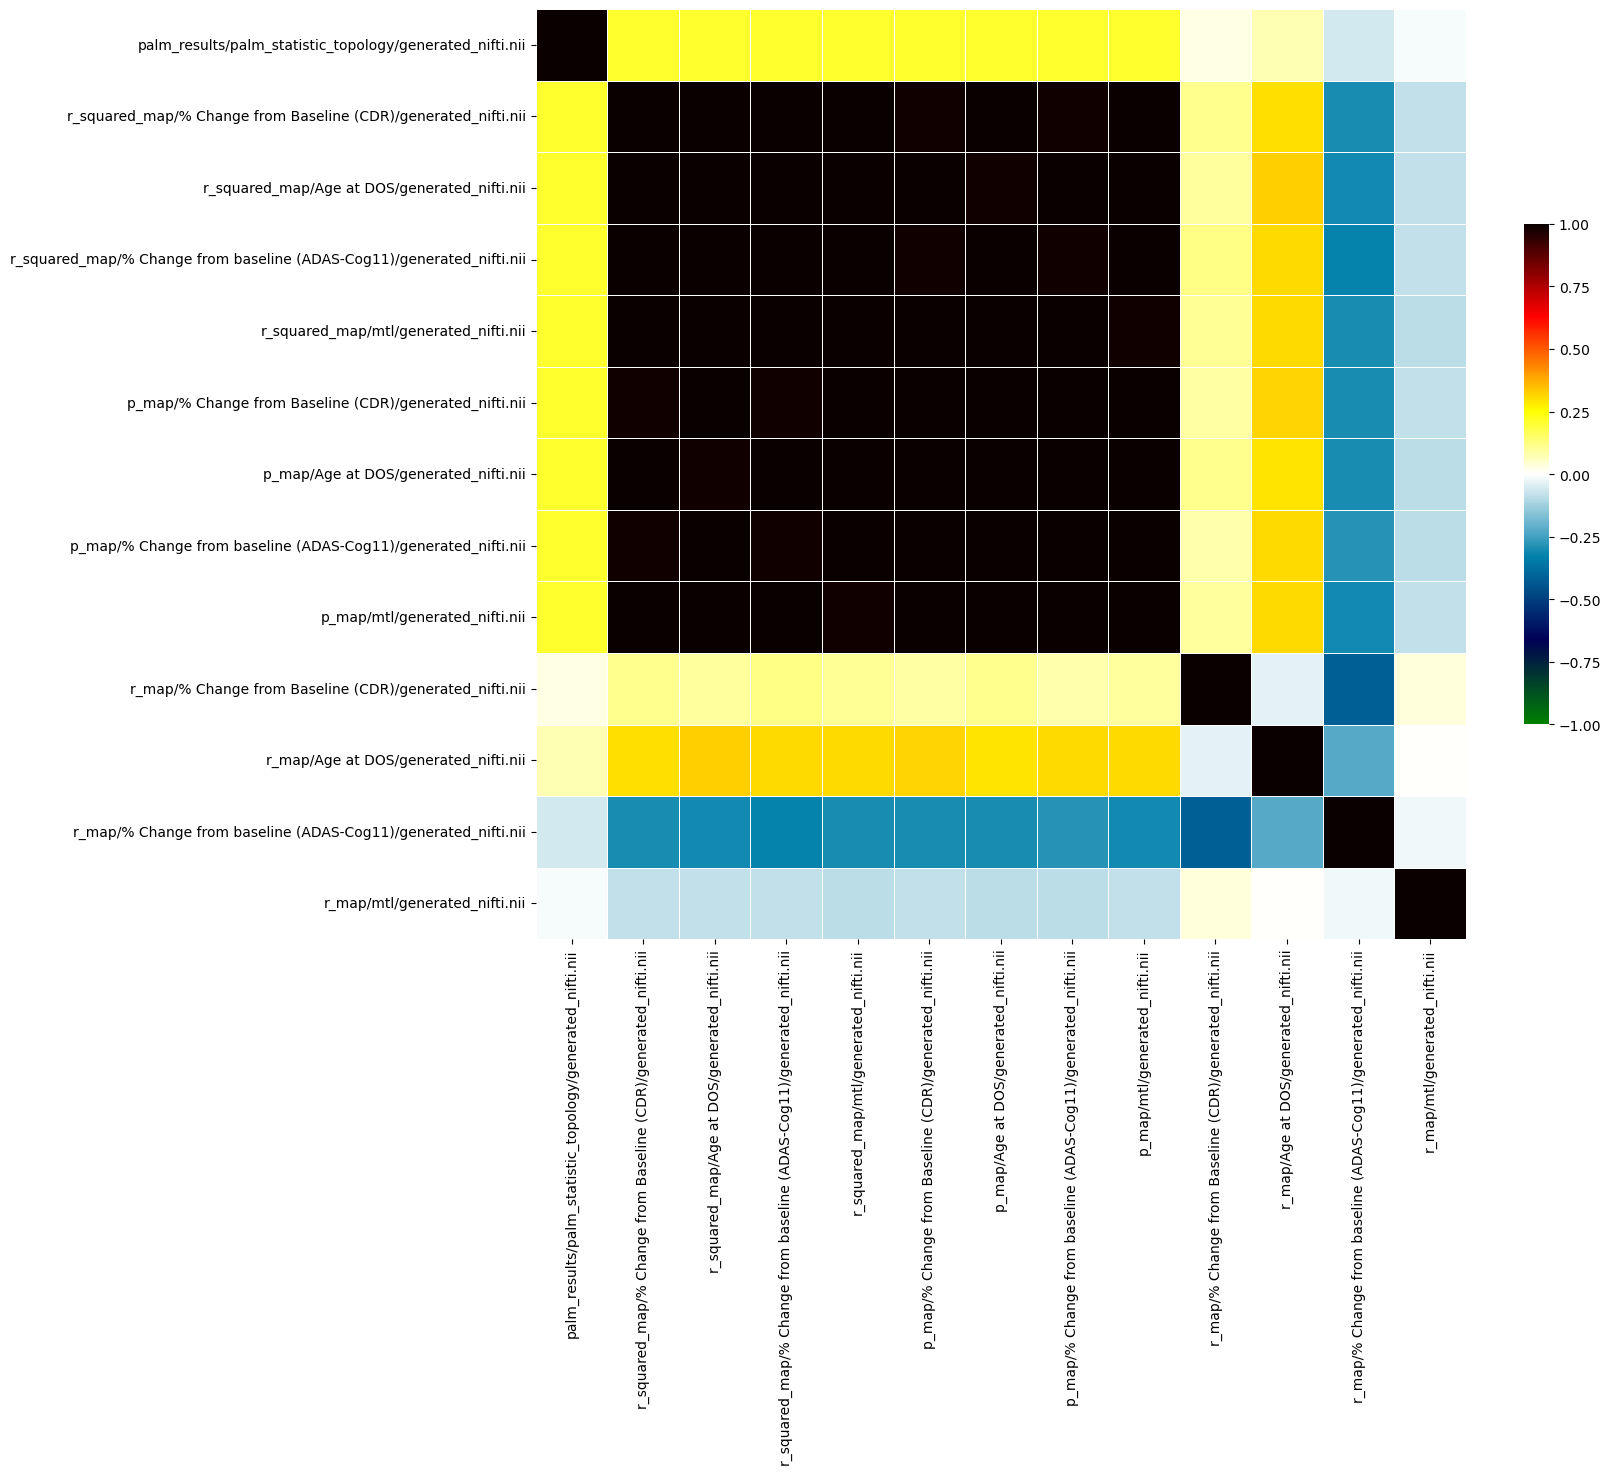

In [15]:
#Create heatmap of correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 13))
sns.heatmap(corr_df, cmap='ocean_hot',square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
# sns.heatmap(corr_df, mask=mask, vmax=.3, center=0, cmap='ocean_hot',
#             


In [109]:
#Save
if os.path.isdir(out_dir)==False:
    os.makedirs(out_dir)
    
corr_df.to_csv(os.path.join(out_dir, f'{methods[method_choice]}_correlation_df.csv'))
fig.savefig(os.path.join(out_dir, f'{methods[method_choice]}_correlation_matrix.png'))

print('Title: ' + f'{methods[method_choice]}_correlation')
print('saved to ' + rf'{out_dir}')

Title: pearson_correlation
saved to /Users/cu135/Dropbox (Partners HealthCare)/memory/functional_networks/spcorrel/ad_dbs_to_gm_z_scores_unthresholded


## Show Specific Heatmap

In [23]:
print(corr_df.columns)

Index(['1202_vat_seed_compound_fMRI_efield.nii',
       '149_vat_seed_compound_fMRI_efield.nii',
       '137_vat_seed_compound_fMRI_efield.nii',
       '144_vat_seed_compound_fMRI_efield.nii',
       '126_vat_seed_compound_fMRI_efield.nii',
       '112_vat_seed_compound_fMRI_efield.nii',
       '103_vat_seed_compound_fMRI_efield.nii',
       '101_vat_seed_compound_fMRI_efield.nii',
       '110_vat_seed_compound_fMRI_efield.nii',
       '146_vat_seed_compound_fMRI_efield.nii',
       '124_vat_seed_compound_fMRI_efield.nii',
       '135_vat_seed_compound_fMRI_efield.nii',
       '129_vat_seed_compound_fMRI_efield.nii',
       '138_vat_seed_compound_fMRI_efield.nii',
       '148_vat_seed_compound_fMRI_efield.nii',
       '1203_vat_seed_compound_fMRI_efield.nii',
       '145_vat_seed_compound_fMRI_efield.nii',
       '127_vat_seed_compound_fMRI_efield.nii',
       '102_vat_seed_compound_fMRI_efield.nii',
       '113_vat_seed_compound_fMRI_efield.nii',
       '111_vat_seed_compound_fMRI_efi

In [24]:
#Enter networks of interest
network_of_interest = 'generated_nifti.nii'
networks_of_disinterest = [
    None   
]

#---isolate network of interest and remove those not of interest
corr_df_2 = corr_df.copy()
corr_df_2 = pd.DataFrame(corr_df_2.loc[:, network_of_interest])
if networks_of_disinterest[0] is not None:
    for network in networks_of_disinterest:
        corr_df_2.drop(network, inplace=True)
#Sort the dataframe by descending order
corr_df_2 = corr_df_2.sort_values(network_of_interest)
#Remove .nii from file names
for name in corr_df_2.columns.values:
    newname = name.split('.nii')[0]
    corr_df_2 = corr_df_2.rename({name: newname}, axis='columns')
for name in corr_df_2.index.values:
    newname = name.split('.nii')[0]
    corr_df_2 = corr_df_2.rename({name: newname}, axis='index')

#---Visualize the new data
#Create heatmap of correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 13))

sns.heatmap(corr_df_2, cmap='ocean_hot',square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)

#Save results
fig.savefig(out_dir + f'/spcorrel_{network_of_interest}.png')
fig.savefig(out_dir + f'/spcorrel_{network_of_interest}.svg')
corr_df_2.to_csv(out_dir + f'/spcorrel_{network_of_interest}.csv')
display(corr_df_2)
print(out_dir)

KeyError: 'generated_nifti.nii'